# 1	Draft Data Dictionary Land Management Schemes [Oct 2020]

## Introduction

This is a reproducible data dictionary based on a python script to scrape Natural England and Forestry Comission open data in order to perform analysis for National Parks England. As this is a script, it can be re-run as and when the data is updated. Moreover, this anlysis is reproducible meaning this analysis can be copied or investigated and improved on. For further details contact;

david.alexander@peakdistrict.gov.uk

The area managed under agri-environment agreements: ie the total area under Environmental Stewardship (ES), Countryside Stewardship (CS) (including its different levels), and area under England Woodland Grant Scheme (EWGS)

### Environmental Stewardship (ES)

**ES** is an agri-environment scheme which provides funding to farmers and other land managers in England who deliver effective environmental management on their land.

It has four elements:
* Entry Level Stewardship (ELS)
* Organic Entry Level Stewardship (OELS)
* Uplands Entry Level Stewardship (Uplands ELS)
* Higher Level Stewardship (HLS).

Upland ELS can apply to any agreement with an ELS or OELS component and therefore their figures are subsumed in the ELS, ELS/HLS, OELS and OELS/HLS categories.

##### Data available;

1. **Environmental Stewardship Scheme (England) holdings agreement** polygons (includes farm business and payment info).

2. **Environmental Stewardship Scheme (England) options** points derived from Genesis tables. 

### Countryside Stewardship (CS)

**CS** is an agri-environment scheme with Higher Tier, full Mid tier, Mid Tier wildlife packages and Hedgerows and Boundaries grant schemes.

##### Data available;

3. **Countryside Stewardship Scheme 2016-2020 Management Areas** geographic extent and location of all land under management within the Countryside Stewardship Agri-Environment Scheme.

4. **Countryside Stewardship Scheme Agreements** holding boundaries data.

6. **Countryside Stewardship Scheme Agreement Option** Points. 

### England Woodland Grants Scheme (EWGS)

**EWGS** is the legacy England Woodland Grant Scheme by the Forestry Commission. EWGS is now closed and was superseded by Countryside Stewardship in 2015.

##### Data available

7. **English Woodland Grant Scheme Boundary** The English Woodland Grant Scheme (EWGS) was launched in 2005 and offered 6 grants for the creation and stewardship of woodlands. This dataset contains the scheme or 'case' boundaries that make up the EWGS applications approved by the Forestry Commission. EWGS is now closed and was superseded by Countryside Stewardship in 2015.

8. **England Woodland Grant Scheme 1** WGS1 operated between June 1988 and June 1991. It was replaced by WGS2.

9. **England Woodland Grant Scheme 2** The dataset identifies areas approved by grant type. As the boundaries of the scheme were never digitised, an approximation polygon was created for each scheme. The approximation is based on the Ordnance Survey grid reference held for each scheme; this point location being buffered by a distance proportional to the total area of the scheme. WGS2 operated between June 1991 and September 1994. It was replaced by WGS3

10. **England Woodland Grant Scheme 3** There are two spatial datasets associated with the WGS. These represent the scheme boundary and the grant areas that are encapsulated by this scheme boundary.WGS3 was operative from October 1994 until its closure to new applications in June 2004.

### Further information

The PDNPA and other NPAs also have their own small scale Land Management Grant Scheme not currently in this analysis.

## Manage the GIS

In [17]:
from arcgis import GIS
from arcgis.features.manage_data import extract_data
import arcpy
import os
import pandas
gis = GIS("Pro")
print(gis)

GIS @ https://www.arcgis.com/ version:8.3


In [59]:
# setup the environment
%matplotlib inline
arcpy.env.addOutputsToMap = True
arcpy.env.overwriteOutput = True
arcpy.env.workspace = 'C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/data/'
outgdb = 'C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/Land Management Schemes.gdb'

## Data used in this analysis

Use the ESRI living Atlas layers as the sources of data

In [43]:
# find the data
CS_item = gis.content.get('b63046f37b5d4869b47ed16d4e23a168')
ES_item = gis.content.get('ca68c90958c342a285d6370ddd7edd66')
EWGS_item = gis.content.get('b04623c9c3d046e8a4e94666b6617df8')
EWGS_1_item = gis.content.get('d527d55fd5104e80b1bf2d80643f5865')
EWGS_2_item = gis.content.get('9752787986da4f44b4abd4bd4f494605')
EWGS_3_item = gis.content.get('3e26fc54a1d4479f90d5f268cc83a0a9')
PDNP_item = gis.content.get('73dc1cbc587f4e518a0010dceb9eab24')
NPE_item = gis.content.get('d333c7529754444894e2d7f5044d1bbf')

<Item title:"Countryside Stewardship Scheme 2016 Management Areas (England)" type:Feature Layer Collection owner:Opendata_NE>
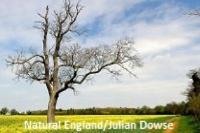

<Item title:"Environmental Stewardship Scheme Agreements (England)" type:Feature Layer Collection owner:Opendata_NE>
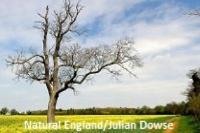

<Item title:"English Woodland Grant Scheme Boundary" type:Feature Layer Collection owner:mapping.geodata_forestry>
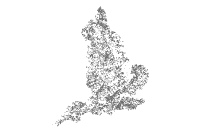

<Item title:"Woodland Grant Scheme 1 England" type:Feature Layer Collection owner:mapping.geodata_forestry>
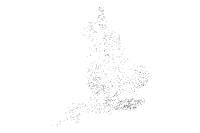

<Item title:"Woodland Grant Scheme 2 England" type:Feature Layer Collection owner:mapping.geodata_forestry>
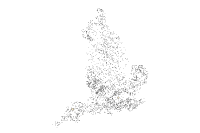

<Item title:"Woodland Grant Scheme 3 England" type:Feature Layer Collection owner:mapping.geodata_forestry>
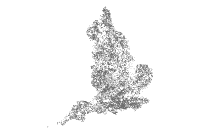

<Item title:"National Parks (England)" type:Feature Layer Collection owner:Opendata_NE>
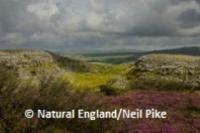

In [44]:
# display the items
data = [CS_item, ES_item, EWGS_item, EWGS_1_item, EWGS_2_item, EWGS_3_item, NPE_item]
for item in data:
    display(item)

In [26]:
# download the data
CS_gbd = extract_data([CS_item], data_format = 'Shapefile')
CS_gbd.download('C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/data')
ES_gbd = extract_data([ES_item], data_format = 'Shapefile')
ES_gbd.download('C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/data')
NPE_gbd = extract_data([NPE_item], data_format = 'Shapefile')
NPE_gbd.download('C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/data')

In [27]:
# add the data to the geodatabase
fcs = arcpy.ListFeatureClasses()
for fc in fcs:
    desc = arcpy.da.Describe(fc)
    outfc = os.path.join(outgdb, desc["baseName"])
    arcpy.CopyFeatures_management(fc, outfc)

## Data pre-processing

1. Clip the data to National Parks England (NPE) boundaries

In [60]:
# Switch the workspace to the geodatabse
arcpy.env.workspace = 'C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/Land Management Schemes.gdb'
# Clip the data to National Park England
arcpy.Clip_analysis("Environmental_Stewardship_Scheme_Agreements__England____Natural_England", "National_Parks__England____Natural_England", "ES_clip")
arcpy.Clip_analysis("Countryside_Stewardship_Scheme_Management_Areas__England____Natural_England", "National_Parks__England____Natural_England", "CS_clip")

2. Call **geopandas** to create a df and use **Pandas** for data processing.

In [30]:
import geopandas as gpd
import pandas as pd

3. Create a new column **[END_YEAR]** and extract the calendar year from **[ENDDATE]** in the dataframe

4. Create a new column **[AREA_CLIP]** using the clipped **geometry** and add the calculated area (as data has been clipped some agreements overlap the boundary). This new column shows the area (sqkm) just inside the National Parks boundary.

5. **Sjoin** the NPE data to the ES and CS data so the data can be analysed collectivley and individually for all NP's

In [58]:
# create a geopandas data frame for NPE
NPE_gdf = gpd.read_file("C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/Land Management Schemes.gdb/", layer = "National_Parks__England____Natural_England")
# take a look :o
NPE_gdf.plot();

##### Environmental Stewardship;

In [53]:
# create a geopandas data frame
ES_clip_gdf = gpd.read_file("C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/Land Management Schemes.gdb/", layer = "ES_clip")
# create the [END_YEAR] column
ES_clip_gdf['END_YEAR'] = pd.DatetimeIndex(ES_clip_gdf['ENDDATE']).year
# create the [AREA] column
ES_clip_gdf['AREA_CLIP'] = ES_clip_gdf['geometry'].area/10**6
# create a spatial join and append the NPE to the left of the gpd
ES_clip_gdf = gpd.sjoin(NPE_gdf, ES_clip_gdf, how="inner", op="intersects")
# take a look at the first 2 rows of the df to check :)
ES_clip_gdf.head(2)

,FID_1_left,CODE,NAME,MEASURE,DESIG_DATE,HOTLINK,STATUS,SHAPE_Leng_left,Shape_Length_left,Shape_Area_left,geometry,index_right,FID_1_right,AGREF,CPH,CUSTNAME,TOWN,SCHEME,REGION,NCA,LAND_CTY,ELSAREA,HLSAREA,APPSTAT,LIVEDATE,STARTDAT,OPTSONAG,TILE,ENDDATE,RDA_NAME,GROSSAR,TOTCOST,AMTPAID,NUMPARCS,ARUAGR,PERMACS,EDUACS,UELSFLG,BUS_FLAG,SHAPE_Leng_right,Shape_Length_right,Shape_Area_right,END_YEAR,AREA_CLIP
0,1,10,SOUTH DOWNS,1653.0,2009-11-02T00:00:00,http://southdowns.gov.uk/,Designated,602554.506861,602554.506861,1.652679e+09,"MULTIPOLYGON (((484696.203 108041.303, 484694....",513,7739,AG00470413,150080081,JR & DL Wolfe,Alton,Entry Level plus Higher Level Stewardship,South East,HAMPSHIRE DOWNS,Hampshire,2619.04,71.84,Live,30/09/2013,01/10/2013,"A13,C,EA1,EB2,EB3,EC1,ED3,EE3,EE6,EF22,EF4,EG1...",SU,30/09/2023,"Dorset, Hampshire and the Isle of Wight Area Team",163.69,74398.37,68368.84,30.0,163.69,NULL,N,N,Y,16830.339534,16830.950910,1.636828e+06,2023,1.636828
0,1,10,SOUTH DOWNS,1653.0,2009-11-02T00:00:00,http://southdowns.gov.uk/,Designated,602554.506861,602554.506861,1.652679e+09,"MULTIPOLYGON (((484696.203 108041.303, 484694....",515,7770,AG00471670,152200094,REED FARM PARTNERSHIP,PETERSFIELD,Entry Level plus Higher Level Stewardship,South East,HAMPSHIRE DOWNS,Hampshire,2032.29,187.07,Live,29/08/2013,01/09/2013,"A13,E,EA1,EB2,EB3,EC1,EC2,EE3,EF1,EF22,EK3,FEP...",SU,31/08/2023,"Dorset, Hampshire and the Isle of Wight Area Team",156.33,92707.04,61583.83,43.0,156.33,NULL,N,N,Y,19660.611946,19660.611896,1.588621e+06,2023,1.588621


##### Countryside Stewardship; 

In [54]:
# create a geopandas data frame
CS_clip_gdf = gpd.read_file("C:/Users/alexad/Documents/ArcGIS/Projects/Land Management Schemes/Land Management Schemes.gdb/", layer = "CS_clip")
# create the [END_YEAR] column
CS_clip_gdf['END_YEAR'] = pd.DatetimeIndex(CS_clip_gdf['ENDDATE']).year
# create the [AREA] column
CS_clip_gdf['AREA_CLIP'] = CS_clip_gdf['geometry'].area/10**6
# create a spatial join and append the NPE to the left of the gpd
CS_clip_gdf = gpd.sjoin(NPE_gdf, CS_clip_gdf, how="inner", op="intersects")
# take a look at the first 2 rows of the df to check :)
CS_clip_gdf.head(2)

,FID_1_left,CODE,NAME,MEASURE,DESIG_DATE,HOTLINK,STATUS_left,SHAPE_Leng_left,Shape_Length_left,Shape_Area_left,geometry,index_right,FID_1_right,CSREF,STATUS_right,CS_TYPE,STARTDATE,ENDDATE,ORG_NAME,DURATION,TOTVAL,GROSSAR,SUM_GIS_HA,AVGANNCOST,TOTVAL_NO,APP_YEAR,MAG_CS_TYP,SHAPE_Leng_right,Shape_Length_right,Shape_Area_right,END_YEAR,AREA_CLIP
0,1,10,SOUTH DOWNS,1653.0,2009-11-02T00:00:00,http://southdowns.gov.uk/,Designated,602554.506861,602554.506861,1.652679e+09,"MULTIPOLYGON (((484696.203 108041.303, 484694....",471,14381,674733,Agreement Live,Mid Tier,01-01-2019 00:00:00,31-12-2023 00:00:00,National Trust,5,28291.95,190.65,38.135134,5658.39,28291.95,2018,COUNTRYSIDE STEWARDSHIP (Middle Tier)\n\n,2906.83452,2906.834520,3.813513e+05,2023,0.381351
0,1,10,SOUTH DOWNS,1653.0,2009-11-02T00:00:00,http://southdowns.gov.uk/,Designated,602554.506861,602554.506861,1.652679e+09,"MULTIPOLYGON (((484696.203 108041.303, 484694....",1808,14413,676435,Agreement Live,WOODLAND MANAGEMENT PLAN,01-05-2019 00:00:00,30-04-2021 00:00:00,EASTBOURNE BOROUGH COUNCIL,2,2259.1,666.33,144.273096,1129.55,2259.10,2019,WOODLAND MANAGEMENT PLAN,27086.53521,26847.071626,1.437498e+06,2021,1.437498


# Data Analysis

In [55]:
NP_gdf.plot()

NameError: name 'NP_gdf' is not defined

### What is the area of land in Environmental & Countryside Stewardship Agreements?

In [40]:
Total_ES_area = ES_clip_gdf['AREA_CLIP'].sum()
Total_CS_area = CS_clip_gdf['AREA_CLIP'].sum()
print (Total_ES_area, "sq km", Total_CS_area, "sq km")

4986.154051473986 sq km 1380.2106257142204 sq km


### By year, what is the area of land by which Environmental Stewardship agreements will be ending?

In [42]:
print(ES_clip_gdf.groupby(by=['AREA_CLIP', 'END_YEAR']).sum().groupby(level=[0]).cumsum())

                    FID_1   ELSAREA  ...    SHAPE_Leng    SHAPE_Area
AREA_CLIP END_YEAR                   ...                            
0.000019  2020       3035    140.80  ...   1685.470647  7.011354e+04
0.000663  2023       7731      0.00  ...   3606.522527  5.094168e+05
0.002861  2022       5314    161.85  ...   2768.683673  1.244791e+05
0.005188  2023       6407    426.14  ...   4129.599755  3.275377e+05
0.010778  2020       9663      0.00  ...    545.667853  1.261819e+04
...                   ...       ...  ...           ...           ...
19.021314 2022       5685  45650.64  ...  96662.554214  1.902131e+07
22.682059 2023       5143  38562.80  ...  34973.649504  2.268206e+07
23.135559 2023       5008  41643.72  ...  39874.368738  2.313556e+07
24.110626 2023       8175  31344.95  ...  58879.259458  2.411173e+07
24.479624 2022       5485  63647.22  ...  51232.656512  2.447962e+07

[341 rows x 7 columns]


### What does the data look like?